In [1]:
#The goal of this project is to predict sales using the given data but also I'm curious to see what else I can find out

#importing libraries needed
import pandas as pd
import numpy as np
import import_ipynb # this lets me import functions from other jupyter projects
import matplotlib.pyplot as plt
%matplotlib inline
import regression #this is a class I wrote myself to reduce the amount of text on tthe screen

df = pd.read_csv('Sales Data.csv', parse_dates=['ORDERDATE'])
df.head()

importing Jupyter notebook from regression.ipynb


,ORDERNUMBER,QUANTITY ORDERED,PRICE EACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107.0,30.0,95.70,2.0,2871.00,2003-02-24,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121.0,34.0,81.35,5.0,2765.90,2003-05-07,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134.0,41.0,94.74,2.0,3884.34,2003-07-01,Shipped,3.0,7.0,2003.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145.0,45.0,83.26,6.0,3746.70,2003-08-25,Shipped,3.0,8.0,2003.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159.0,49.0,100.00,14.0,5205.27,2003-10-10,Shipped,4.0,10.0,2003.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD11940>,
      dtype=object)

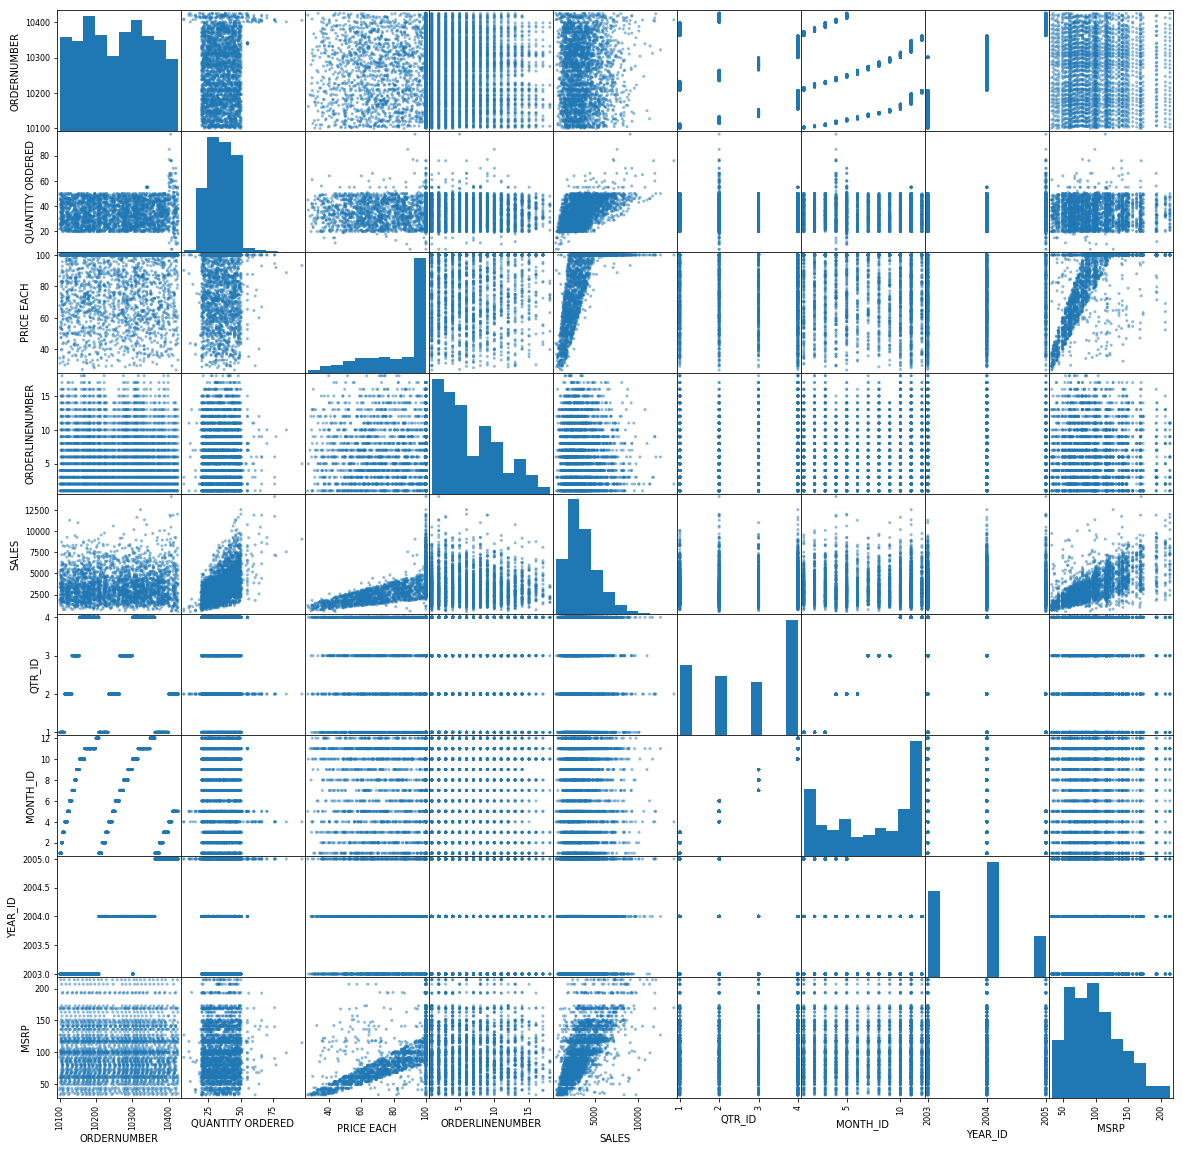

In [2]:
#Luckly there aren't any missing values so now onto the regression
pd.plotting.scatter_matrix(df,figsize=(20,20)) #I want to see how the variables are related to each other

In [3]:
#There are definately some variables that can be dropped
#Before I start sending features to the chopping blocking, 
#I want to see how well the linear model does with all the features as a base line.
x=df[df.corr().columns]
x=x.drop(columns=['SALES'])
y=df.SALES
regression.results(x,y)

On average, the model explains 79.25% of the variance in the data.


In [4]:
#With 8 features, we get an r^2 value of about 79%. Not a bad start. Now we can start removing features
df.corr()

,ORDERNUMBER,QUANTITY ORDERED,PRICE EACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.051383,-0.039723,0.904596,-0.010280
QUANTITY ORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881
PRICE EACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239
QTR_ID,-0.051383,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234
MONTH_ID,-0.039723,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170
YEAR_ID,0.904596,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310
MSRP,-0.010280,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000


In [5]:
#After looking at the scatter matrix 3 cell above and the correletion matrix above, I can confidently remove 
# 'YEAR_ID','MONTH_ID','QTR_ID'and 'ORDERLINENUMBER' .

df=df.drop(columns=['YEAR_ID','MONTH_ID','QTR_ID','ORDERLINENUMBER'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000540B978>,
      dtype=object)

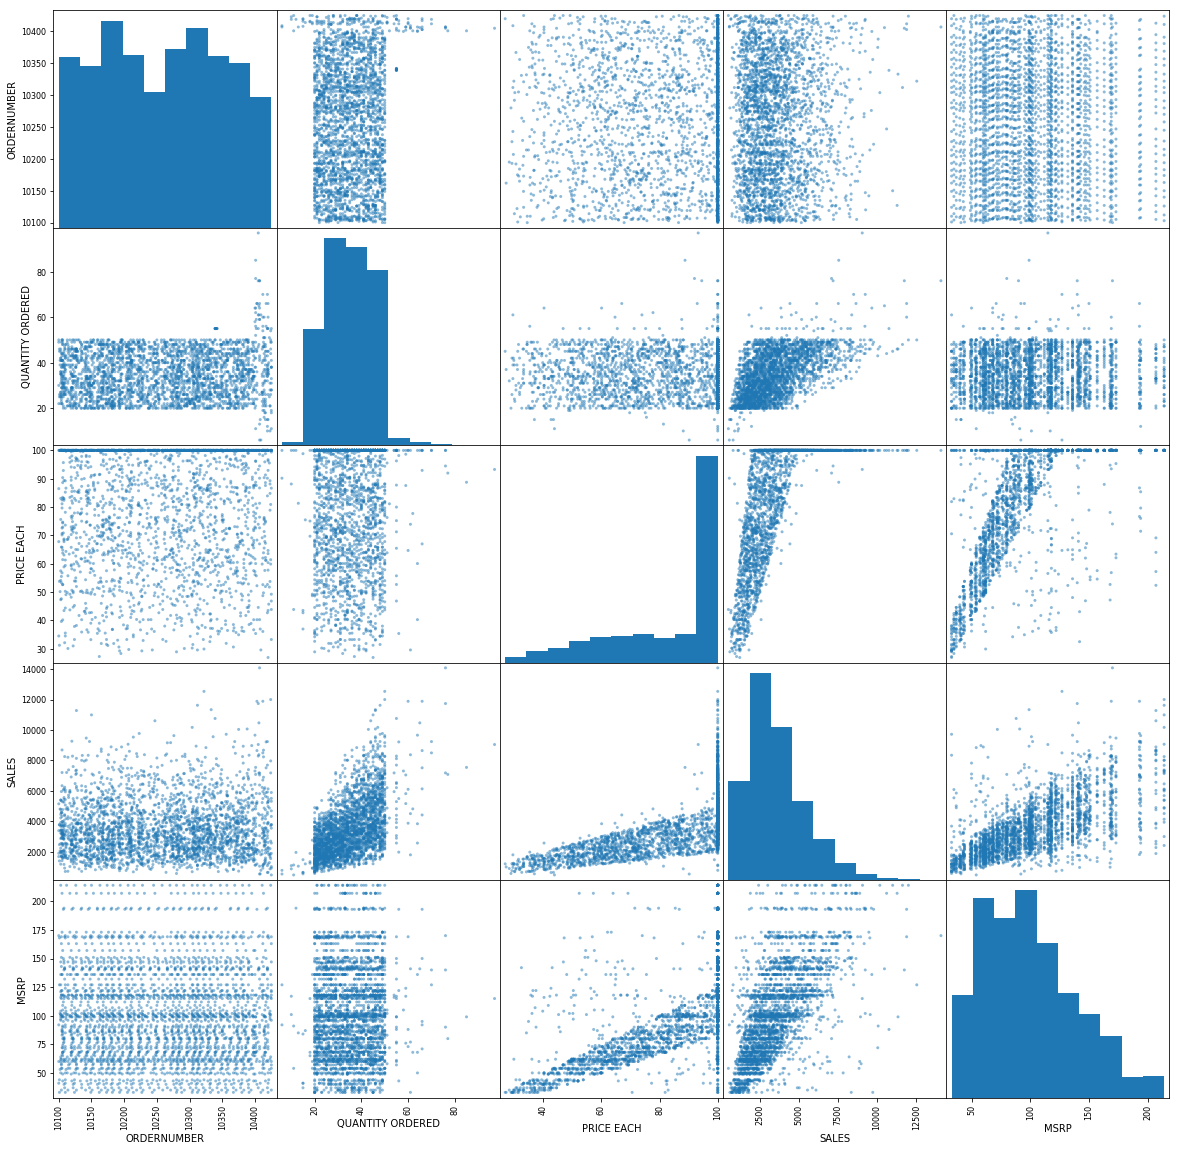

In [6]:
pd.plotting.scatter_matrix(df,figsize=(20,20)) #I want to see how the variables are related to each other

In [7]:
#'MSRP','QUANTITY ORDERED','PRICE EACH' seem like good candidates for the linear model. I will fit the model with these
#features and see what happens.
x=df[['MSRP','QUANTITY ORDERED','PRICE EACH']]
regression.results(x,y)

On average, the model explains 79.42% of the variance in the data.


In [8]:
#We were able to achieve a similar r^2 value using left than half of the features! This is great, but we can do better
x.corr()

,MSRP,QUANTITY ORDERED,PRICE EACH
MSRP,1.000000,0.017881,0.670625
QUANTITY ORDERED,0.017881,1.000000,0.005564
PRICE EACH,0.670625,0.005564,1.000000


In [9]:
#We can see from the cell above that 'MSRP' and 'PRICE EACH' are highly correlated which hurts the model. We can fix this 
#issue by adding an interaction term and dropping one of the columns
priceXmsrp=[]
for i in range(df.shape[0]):
    priceXmsrp.append(df['PRICE EACH'][i]*df.MSRP[i])
x['PXM']=priceXmsrp
x=x.drop(columns=['MSRP'])
regression.results(x,y)

C:\Users\Tendai Meda\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


On average, the model explains 81.39% of the variance in the data.


In [10]:
#Awesome! Using only 3 features, our linear model can explain 81% of the variance in our data.

In [21]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts

x_tr,x_te,y_tr,y_te=tts(x,y,test_size=0.2)
model=LR().fit(x_tr,y_tr)
predicted=model.predict(x)
resid=y-predicted


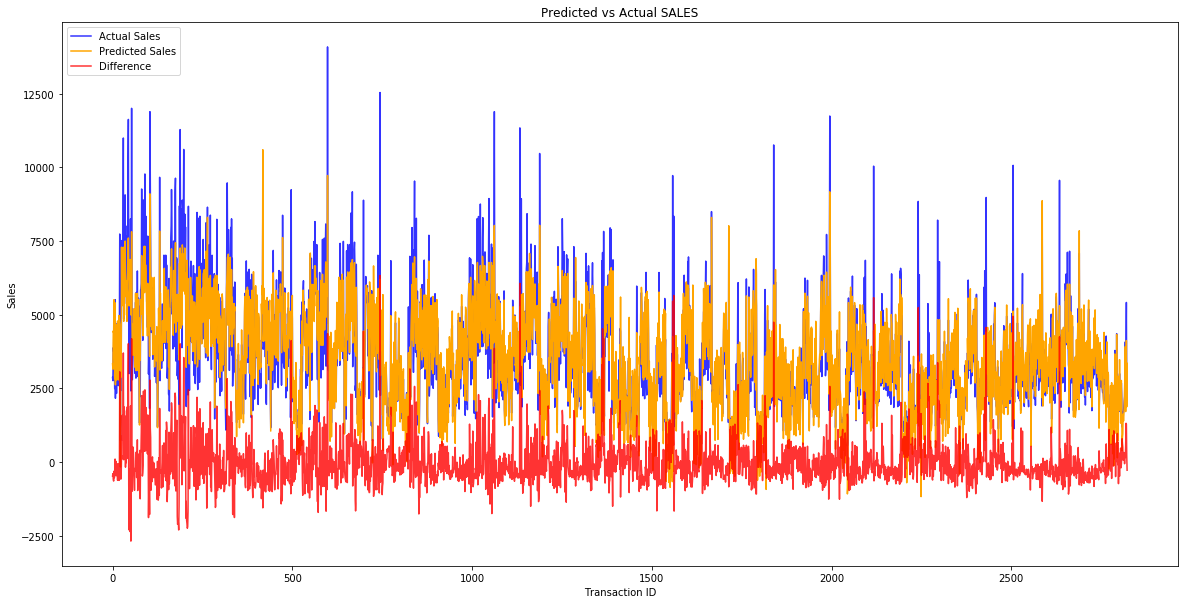

In [22]:
#Here is what the difference between predicted sales and actual sales looks like. Not too shabby!
plt.figure(figsize=(20,10))
plt.title('Predicted vs Actual SALES')
plt.xlabel('Transaction ID')
plt.ylabel('Sales')
plt.plot(y,color='blue',label='Actual Sales',alpha=0.8)
plt.plot(predicted,color='orange',label='Predicted Sales',alpha=1)
plt.plot(resid,color='red',label='Difference',alpha=0.8)
plt.legend(loc='upper left')